In [23]:
#导入skleran 机器学习工具包的k-means
from sklearn.cluster import KMeans
from sklearn.externals import joblib
import numpy as np
#Python导入Matplotlib包，专门用于绘图
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D
import time

# 数据导入

In [24]:
Training_Data=np.loadtxt('D:\杭电与人工智能研究院\光伏教仪\人工智能课程案例\课程实验课件\机器学习课程实验四___聚类分析\Training_Data.txt')

# 调用kmeans类

#n_clusters=4生成聚类数，即产生的质心数
#max_iter 执行一次k-means算法所进行的最大迭代数
#n_init 用不同的质心初始化值运行算法的次数，最终解是在inertia意义下选出的最优结果。

In [30]:
#预先设定聚类簇个数
Num_Clusters=4

#聚类函数初始化
Cluster_K_Means= KMeans(n_clusters=4, max_iter=300, n_init=10)

# 记录训练开始时间
Begin_Time = time.time() 
#s = Cluster_K_Means.fit(Training_Data)

#训练数据聚类
Cluster_K_Means_fit= Cluster_K_Means.fit(Training_Data)

Training_Time = time.time() - Begin_Time  # 记录训练用时

#对数据进行预测
y_pred = Cluster_K_Means.fit_predict(Training_Data)

#4个质心
print(Cluster_K_Means.cluster_centers_) 

[[ 15.68478873   0.18697183]
 [ 14.20316514   0.14243119]
 [ 14.94741445   0.1706654 ]
 [ 13.23711864   0.10579096]]


In [31]:
# 获取第一列和第二列数据 使用for循环获取 n[0]表示数据第一列
x1 = [n[0] for n in Training_Data]
x2 = [n[1] for n in Training_Data]

c1 = [m[0] for m in Cluster_K_Means.cluster_centers_]
c2 = [m[1] for m in Cluster_K_Means.cluster_centers_]


In [32]:
from sklearn.metrics.pairwise import pairwise_distances_argmin
# 结果可视化
plt.figure(figsize=(16, 6))  # 窗口大小
#fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)  # # 窗口四周留白

# 四种聚类的颜色
colors = ['#4EACC5', '#FF9C34', '#4E9A06','#EE82EE']  

# 质心排序
k_means_cluster_centers = np.sort(Cluster_K_Means.cluster_centers_, axis=0) 

# 计算X中每个样本与k_means_cluster_centers中的哪个样本最近。也就是获取所有对象的所属的类标签
k_means_labels = pairwise_distances_argmin(Training_Data, k_means_cluster_centers) 



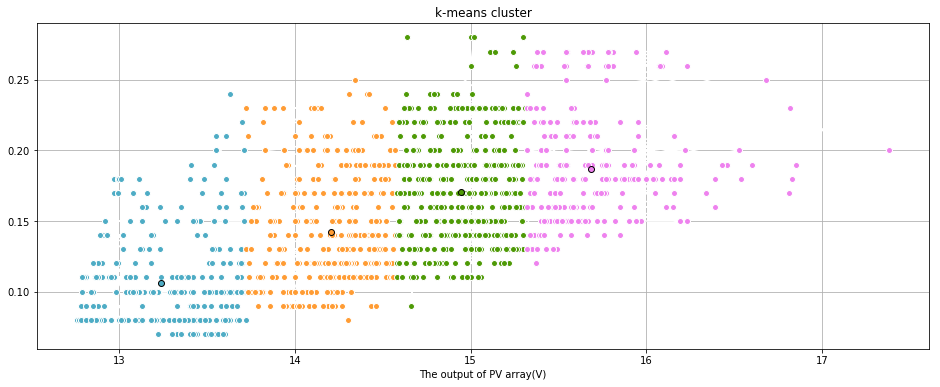

In [33]:
for k, col in zip(range(Num_Clusters), colors):
    my_members = k_means_labels == k  # 获取属于当前类别的样本
    cluster_center = k_means_cluster_centers[k]  # 获取当前聚类中心
     #绘制当前聚类的样本点
    plt.plot(Training_Data[my_members, 0], Training_Data[my_members, 1], 'w',markerfacecolor=col, marker='o') 
    # 绘制聚类中心点
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,markeredgecolor='k', markersize=6) 

plt.grid(True)
plt.xlabel('The output of PV array(V)')
plt.xlabel('The output of PV array(V)')

plt.title('k-means cluster')
# 显示图形
plt.show()